11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8011 - loss: 0.6234 - val_accuracy: 0.9811 - val_loss: 0.0568
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9689 - loss: 0.1024 - val_accuracy: 0.9873 - val_loss: 0.0408
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9785 - loss: 0.0716 - val_accuracy: 0.9888 - val_loss: 0.0309
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9832 - loss: 0.0577 - val_accuracy: 0.9896 - val_loss: 0.0275
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9851 - loss: 0.0464 - val_accuracy: 0.9905 - val_loss: 0.0273
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9880 - loss: 0.0395 - val_accuracy: 0.9918 - val_loss: 0.0233
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9882 - loss: 0.0375 - val_accuracy: 0.9930 - val_loss: 0.0224
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9900 - loss: 0.0321 - val_accuracy: 

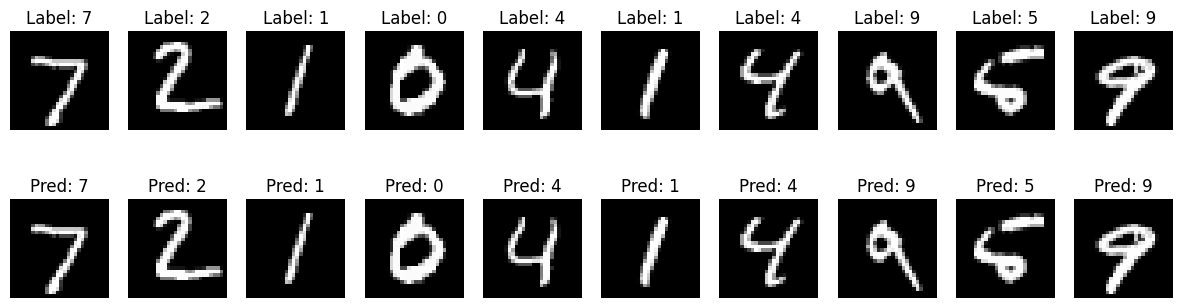

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# 1. Load and preprocess the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape to (samples, 28, 28, 1) and normalize
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 2. Build the CNN model
model = Sequential()

# Conv Layer 1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# MaxPooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Conv Layer 2
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# MaxPooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and Dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Regularization
model.add(Dense(10, activation='softmax'))  # Output layer for 10 classes

# 3. Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 4. Train the model
model.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
          validation_data=(x_test, y_test))

# 5. Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# 6. Predict and visualize some results
predictions = model.predict(x_test)

# Visualize first 10 predictions
plt.figure(figsize=(15, 4))
for i in range(10):
    plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title("Label: " + str(np.argmax(y_test[i])))

    plt.subplot(2, 10, i + 11)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title("Pred: " + str(np.argmax(predictions[i])))
plt.show()
